In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
data.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Filling null values of data 

In [6]:
nullobject = []
for i in data:
    if (data[i].dtype == "object" and data[i].isna().sum()>0):
        nullobject.append(i)

In [7]:
nullobject

['qualification',
 'income_level',
 'marital_status',
 'housing_status',
 'employment']

In [8]:
for i in nullobject:
    data[i].fillna(data[i].mode()[0] , inplace = True)

In [9]:
data.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [10]:
nullfloat = []
for i in data:
    if (data[i].dtype == "float" and data[i].isna().sum()>0):
        nullfloat.append(i)

In [11]:
nullfloat

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [12]:
for i in nullfloat:
    data[i].fillna(data[i].mode()[0] , inplace = True)

In [13]:
data.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# data Analysis

([<matplotlib.patches.Wedge at 0x2a24f512f10>,
 [Text(-0.8639477490730085, 0.680877585819714, 'No'),
  Text(0.8639477490730082, -0.6808775858197146, 'Yes')],
 [Text(-0.4712442267670955, 0.37138777408348034, '78.8'),
  Text(0.4712442267670953, -0.3713877740834806, '21.2')])

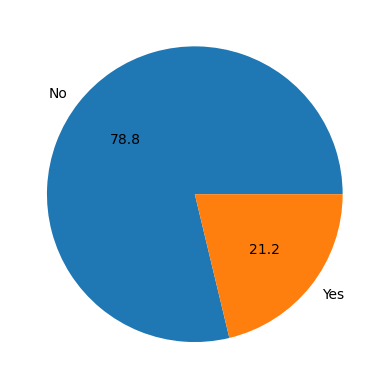

In [14]:
size = data["h1n1_vaccine"].value_counts().values
label = ["No" ,"Yes"]
plt.pie(size ,labels= label , autopct = "%1.1f" )

# Majority of the people have not  got vaccinated

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

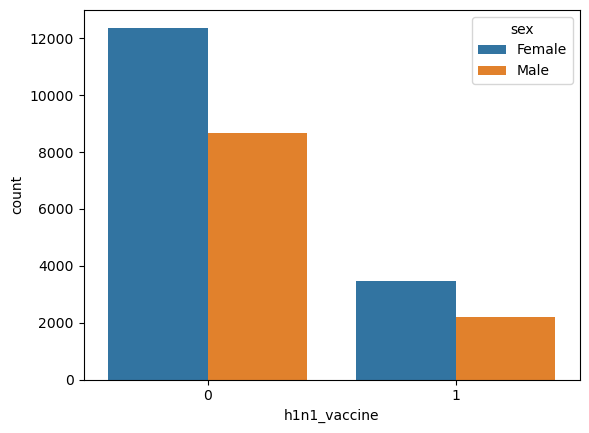

In [15]:
sns.countplot( x = "h1n1_vaccine" , hue = "sex" , data = data)

# majority of male and females have not got their vaccination done

<Axes: xlabel='age_bracket', ylabel='count'>

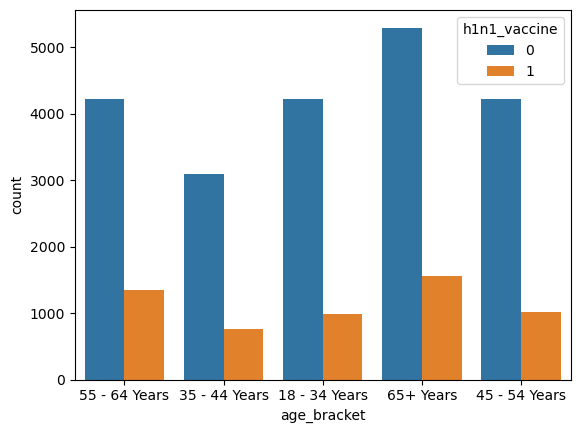

In [16]:
sns.countplot( x = "age_bracket" , hue = "h1n1_vaccine" , data = data)

# people with age >= 65 are majority in case of not getting vaccinated 

<Axes: xlabel='income_level', ylabel='count'>

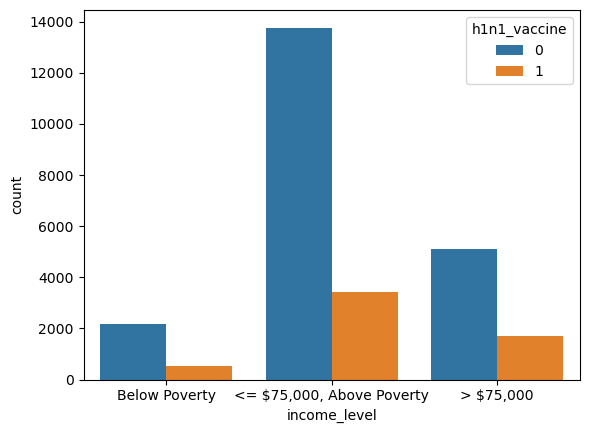

In [17]:
sns.countplot( x = "income_level" , hue = "h1n1_vaccine" , data = data)

# Majority of people with salary greater than 75000 have not got their vaccination

<Axes: xlabel='sex', ylabel='count'>

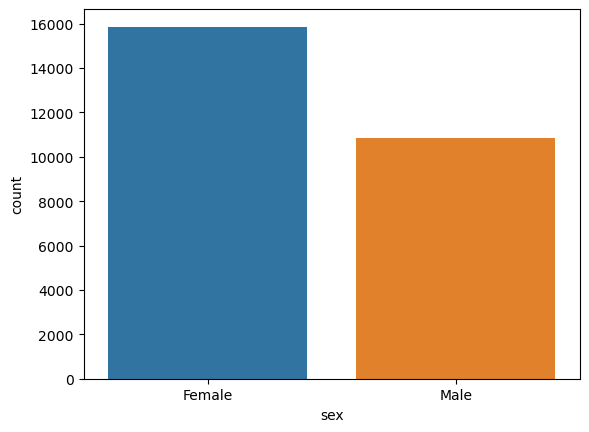

In [18]:
sns.countplot(x = "sex" , data = data)

# We have majority of females

<Axes: xlabel='employment', ylabel='count'>

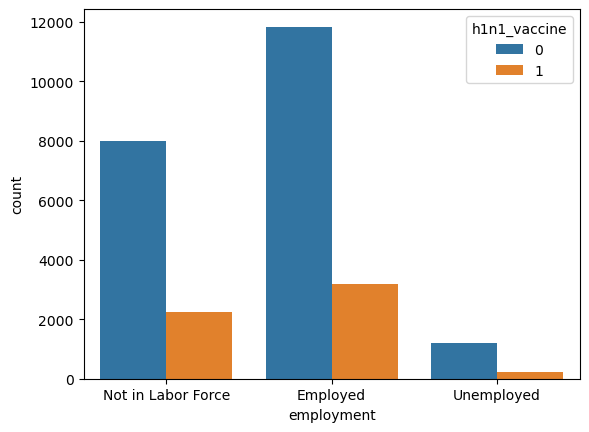

In [19]:
sns.countplot(x = "employment" , hue = "h1n1_vaccine",data = data)

# Even though we have higher employed people yet still they are high in terms of not vaccinated 

<Axes: xlabel='has_health_insur', ylabel='count'>

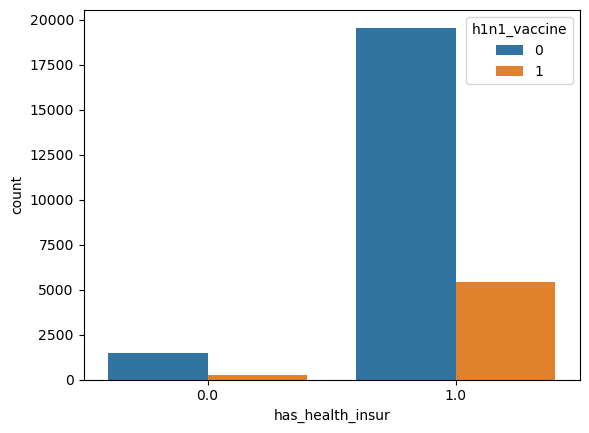

In [20]:
sns.countplot(x = "has_health_insur" , hue = "h1n1_vaccine" , data = data)

# Majority people having heath indurance have not got their vaccination done

<Axes: xlabel='census_msa', ylabel='count'>

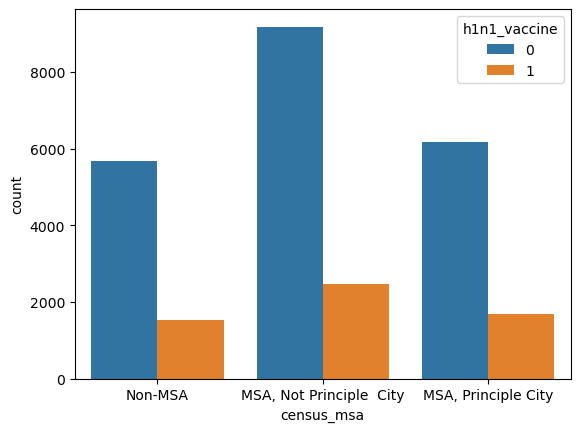

In [21]:
sns.countplot(x = "census_msa" , hue = "h1n1_vaccine" , data = data)

# maximum of not Principle city people have not got vaccinated

# Change the categorical data 

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le  = LabelEncoder()

In [24]:
obcol = data.select_dtypes(include = np.object_)

In [25]:
obcol

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [26]:
for i in obcol:
    data[i] = le.fit_transform(data[i])

In [27]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0


# Feature selection

In [28]:
from sklearn.feature_selection import chi2

In [29]:
x1 = data.drop("h1n1_vaccine" , axis = 1)
y1 = data["h1n1_vaccine"]

In [30]:
score = chi2(x1,y1)

In [31]:
score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 2.01459556e+01,
        1.49313640e+01, 6.77656778e+00, 1.28867110e+01, 3.05614312e+01,
        1.99380265e+01, 2.49155964e+00, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

In [32]:
p_value = pd.Series(score[1] , index = x1.columns)

In [33]:
p_value

unique_id                    4.300081e-280
h1n1_worry                    1.055106e-45
h1n1_awareness                3.936209e-26
antiviral_medication          1.439205e-10
contact_avoidance             6.502377e-05
bought_face_mask              1.208234e-28
wash_hands_frequently         3.676949e-07
avoid_large_gatherings        1.780901e-02
reduced_outside_home_cont     3.285826e-03
avoid_touch_face              5.294085e-11
dr_recc_h1n1_vacc             0.000000e+00
dr_recc_seasonal_vacc        4.191373e-196
chronic_medic_condition       1.733178e-39
cont_child_undr_6_mnths       1.365047e-25
is_health_worker             2.996320e-148
has_health_insur              8.091436e-02
is_h1n1_vacc_effective       8.445973e-110
is_h1n1_risky                 0.000000e+00
sick_from_h1n1_vacc           5.657917e-27
is_seas_vacc_effective        7.425798e-55
is_seas_risky                8.601899e-268
sick_from_seas_vacc           1.556674e-01
age_bracket                   3.694183e-11
qualificati

In [34]:
temp = []
for i in p_value.index:
    if(p_value[i] <= 0.05):
        print(i, " : Not accepted")
    else:
        print(i, " : accepted")
        temp.append(i)

unique_id  : Not accepted
h1n1_worry  : Not accepted
h1n1_awareness  : Not accepted
antiviral_medication  : Not accepted
contact_avoidance  : Not accepted
bought_face_mask  : Not accepted
wash_hands_frequently  : Not accepted
avoid_large_gatherings  : Not accepted
reduced_outside_home_cont  : Not accepted
avoid_touch_face  : Not accepted
dr_recc_h1n1_vacc  : Not accepted
dr_recc_seasonal_vacc  : Not accepted
chronic_medic_condition  : Not accepted
cont_child_undr_6_mnths  : Not accepted
is_health_worker  : Not accepted
has_health_insur  : accepted
is_h1n1_vacc_effective  : Not accepted
is_h1n1_risky  : Not accepted
sick_from_h1n1_vacc  : Not accepted
is_seas_vacc_effective  : Not accepted
is_seas_risky  : Not accepted
sick_from_seas_vacc  : accepted
age_bracket  : Not accepted
qualification  : Not accepted
race  : Not accepted
sex  : Not accepted
income_level  : Not accepted
marital_status  : Not accepted
housing_status  : Not accepted
employment  : accepted
census_msa  : accepted
no_o

In [35]:
temp

['has_health_insur',
 'sick_from_seas_vacc',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children']

In [36]:
data.drop(temp ,axis = 1 , inplace = True)

# We will find correlation and drip the columns which hase negative impact on our model

In [37]:
data.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,h1n1_vaccine
unique_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,0.005880,-0.005545,0.010692,-0.000355,-0.002298,0.005169,-0.004365,-0.003021,-0.007372,-0.003280
h1n1_worry,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,0.231649,0.327986,0.060573,-0.047970,-0.130248,-0.127503,0.046844,-0.028045,0.000714,0.121574
h1n1_awareness,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.085281,0.081156,-0.045029,0.168564,0.150439,-0.067567,-0.018002,-0.108783,-0.108313,0.117771
antiviral_medication,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,0.014498,0.081503,-0.094191,-0.027888,-0.110963,-0.006196,0.061054,0.005924,0.056575,0.040226
contact_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.117356,0.127991,0.003369,0.014385,0.001699,-0.112591,0.016870,-0.045367,-0.028909,0.046837
bought_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,0.040889,0.105917,0.005206,-0.015468,-0.083075,-0.049912,0.038494,0.001622,0.043492,0.070413
wash_hands_frequently,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,0.136936,0.170655,0.017109,-0.018922,-0.065468,-0.157033,0.023675,-0.041226,-0.017509,0.074570
avoid_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,0.078208,0.130800,0.093339,-0.089002,-0.108378,-0.055871,0.015420,0.025476,0.047477,0.018089
reduced_outside_home_cont,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,0.066861,0.117428,0.089049,-0.106340,-0.124640,-0.039100,0.034265,0.024708,0.063544,0.022080
avoid_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,0.104530,0.141537,0.052805,-0.030293,-0.056717,-0.162693,0.003681,-0.027781,-0.017302,0.070855


In [38]:
data.drop(["housing_status","marital_status","sex", "unique_id"] , axis = 1 , inplace = True)

# Test train our data 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.drop("h1n1_vaccine" , axis = 1)
Y = data["h1n1_vaccine"]

In [72]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.35 , random_state = 30)

# Import model

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(X_train , Y_train)

LogisticRegression()

In [76]:
pred = lr.predict(X_test)

# Model Evaluation

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, f1_score
print("Accuracy score:",accuracy_score(Y_test,pred))
print("f1-score", f1_score(Y_test,pred))
print("auc score: ", roc_auc_score(Y_test,pred))

Accuracy score: 0.8301240907145914
f1-score 0.50375
auc score:  0.6747263957192912


# Applying SMOTE due to class imbalance

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
sm = SMOTE(random_state = 30)

In [80]:
x_sm , y_sm = sm.fit_resample(X , Y)

In [81]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm , y_sm , test_size = 0.35)

In [82]:
lr.fit(X_train , Y_train)

LogisticRegression()

In [83]:
predicts = lr.predict(X_test)

In [84]:
print("Accuracy score:",accuracy_score(Y_test,predicts))
print("f1-score", f1_score(Y_test,predicts))
print("auc score: ", roc_auc_score(Y_test,predicts))

Accuracy score: 0.7659603368649823
f1-score 0.7599944281933416
auc score:  0.7661987244582351


# AUC score = 77%